In [1]:
import torch
import nltk
import evaluate
import multiprocessing
nltk.download('punkt')
from torch.utils.data import DataLoader, Dataset
import numpy as np
from tqdm import tqdm
import pandas as pd
from nltk import sent_tokenize
import math, re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from datasets import load_dataset, DatasetDict, load_from_disk
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import Trainer, TrainingArguments, pipeline
import argparse
import pickle
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt

/home/haskari/miniconda3/envs/acl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /home/haskari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
data = load_from_disk("saved_models/pegasus-cnn")

In [6]:
dataset

Dataset({
    features: ['article', 'highlights', 'id', 'original_article', 'segment_idxs', 'mapping', 'article_length', 'highlights_length', 'model_summaries', 'mapping_gen'],
    num_rows: 11490
})

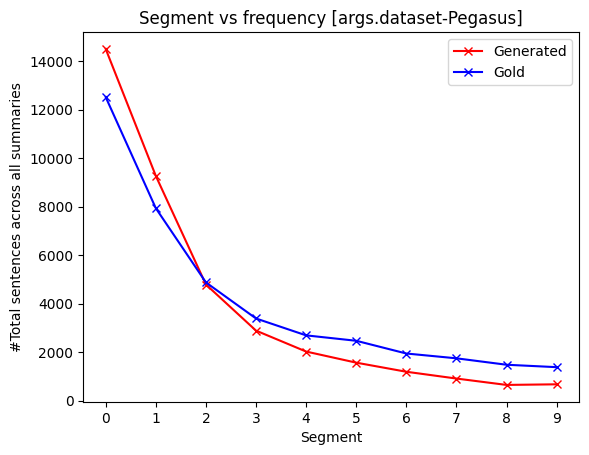

In [13]:
cumm_list1 = [0]*10
cumm_list2 = [0]*10

for ind, da in enumerate(data):
    y1 = da['mapping_gen']
#     print(y)
    cumm_list1 = [a+b for a,b in zip(cumm_list1, y1)]
    y2 = da['mapping']
#     print(y)
    cumm_list2 = [a+b for a,b in zip(cumm_list2, y2)]

x = [j for j in range(10)]

markers=[0,1,2,3,4,5,6,7,8,9]

plt.xlabel("Segment")
plt.ylabel("#Total sentences across all summaries")
plt.title("Segment vs frequency [{}-Pegasus]".format('args.dataset'))

plt.plot(x, cumm_list1,'-rx', label="Generated", markevery=markers)
plt.plot(x, cumm_list2,'-bx', label="Gold", markevery=markers)
plt.xticks(x)
plt.legend()

# plt.savefig('results/pegasus-{}.png'.format('args.dataset'))